# COMPARACIÓN DE EVI Y NDVI DE LAS DIFERENTES ESPECIES DENTRO Y FUERA DE LA RESERVA

En esta libreta se realiza la graficación de las lecturas de EVI y NDVI de las diferentes especies dentro y fuera de la reserva. Cada punto representa el valor promedio de las métricas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
def promediarDf(df):
    """
        Con esta función se obtiene el promedio de las métricas en un día
        determinado. Los promedios se almacenan en otro DataFrame.
        
        Parámetros
        ----------
        - df: DataFrame original
        
        Regresa
        -------
        - DataFrame con los promedios calculados
    """
    # Se crea un diccionario para almacenar las fechas y los promedios
    dict_promedios = {'fecha':[], 'promedio':[]}
    # Se itera cada columna para obtener su promedio
    for col in df.columns[2:]:
        dict_promedios['fecha'].append(col)
        dict_promedios['promedio'].append(df[col].mean())
    # Se regresa un nuevo DataFrame con los promedios obtenidos
    return pd.DataFrame(dict_promedios)
        

In [3]:
def comparacionMetricas(ruta, metrica, especie):
    """
        Esta función lee los DataFrames originales (dentro y fuera de la
        reserva) de alguna especie y de alguna métrica, después llama a 
        la función 'promediarDf()' para obtener los promedios de las 
        mediciones y finalmente grafica las series de tiempo.
        
        Parámetros
        ----------
        - Ruta: Ruta base en donde se encuentran los conjuntos de datos
        - metrica: Métrica a comparar (EVI o NDVI)
        - especie: Especie a leer
        
    """
    # Se leen los archivos correspondientes a la especie dentro y fuera
    df_dentro = pd.read_csv(f'{ruta}/{metrica}/{metrica}-DENTRO/{especie}.csv')
    df_fuera = pd.read_csv(f'{ruta}/{metrica}/{metrica}-FUERA/{especie}.csv')

    # Se obtiene el valor promedio de la metrica para cada dia dentro y fuera 
    df_prom_dentro = promediarDf(df_dentro)
    df_prom_fuera = promediarDf(df_fuera)

    # Tamaño de la gráfica
    plt.figure(figsize=(16, 8), dpi=150)

    # Graficamos ambas series de tiempo
    df_prom_dentro.promedio.plot(label='Dentro', color='orange')
    df_prom_fuera.promedio.plot(label='Fuera')


    # se añade el título
    plt.title(f'Comparación de las mediciones promedio del {metrica} de la especie {especie} dentro y fuera de la reserva')

    # Se añade la etiqueta al eje x 
    plt.xlabel(f'{metrica} (Promedio)')

    # Añadimos la leyenda
    plt.legend()

    _ = plt.show()

In [4]:
ruta = 'Material Sara Dennis'
especies = [
    'ENCINAR', 'MATSUB', 'MATXERO', 'MEZQUITAL',
    'PASTINDU', 'PASTIZAL','VEGARRO'
]

## Comparación del EVI

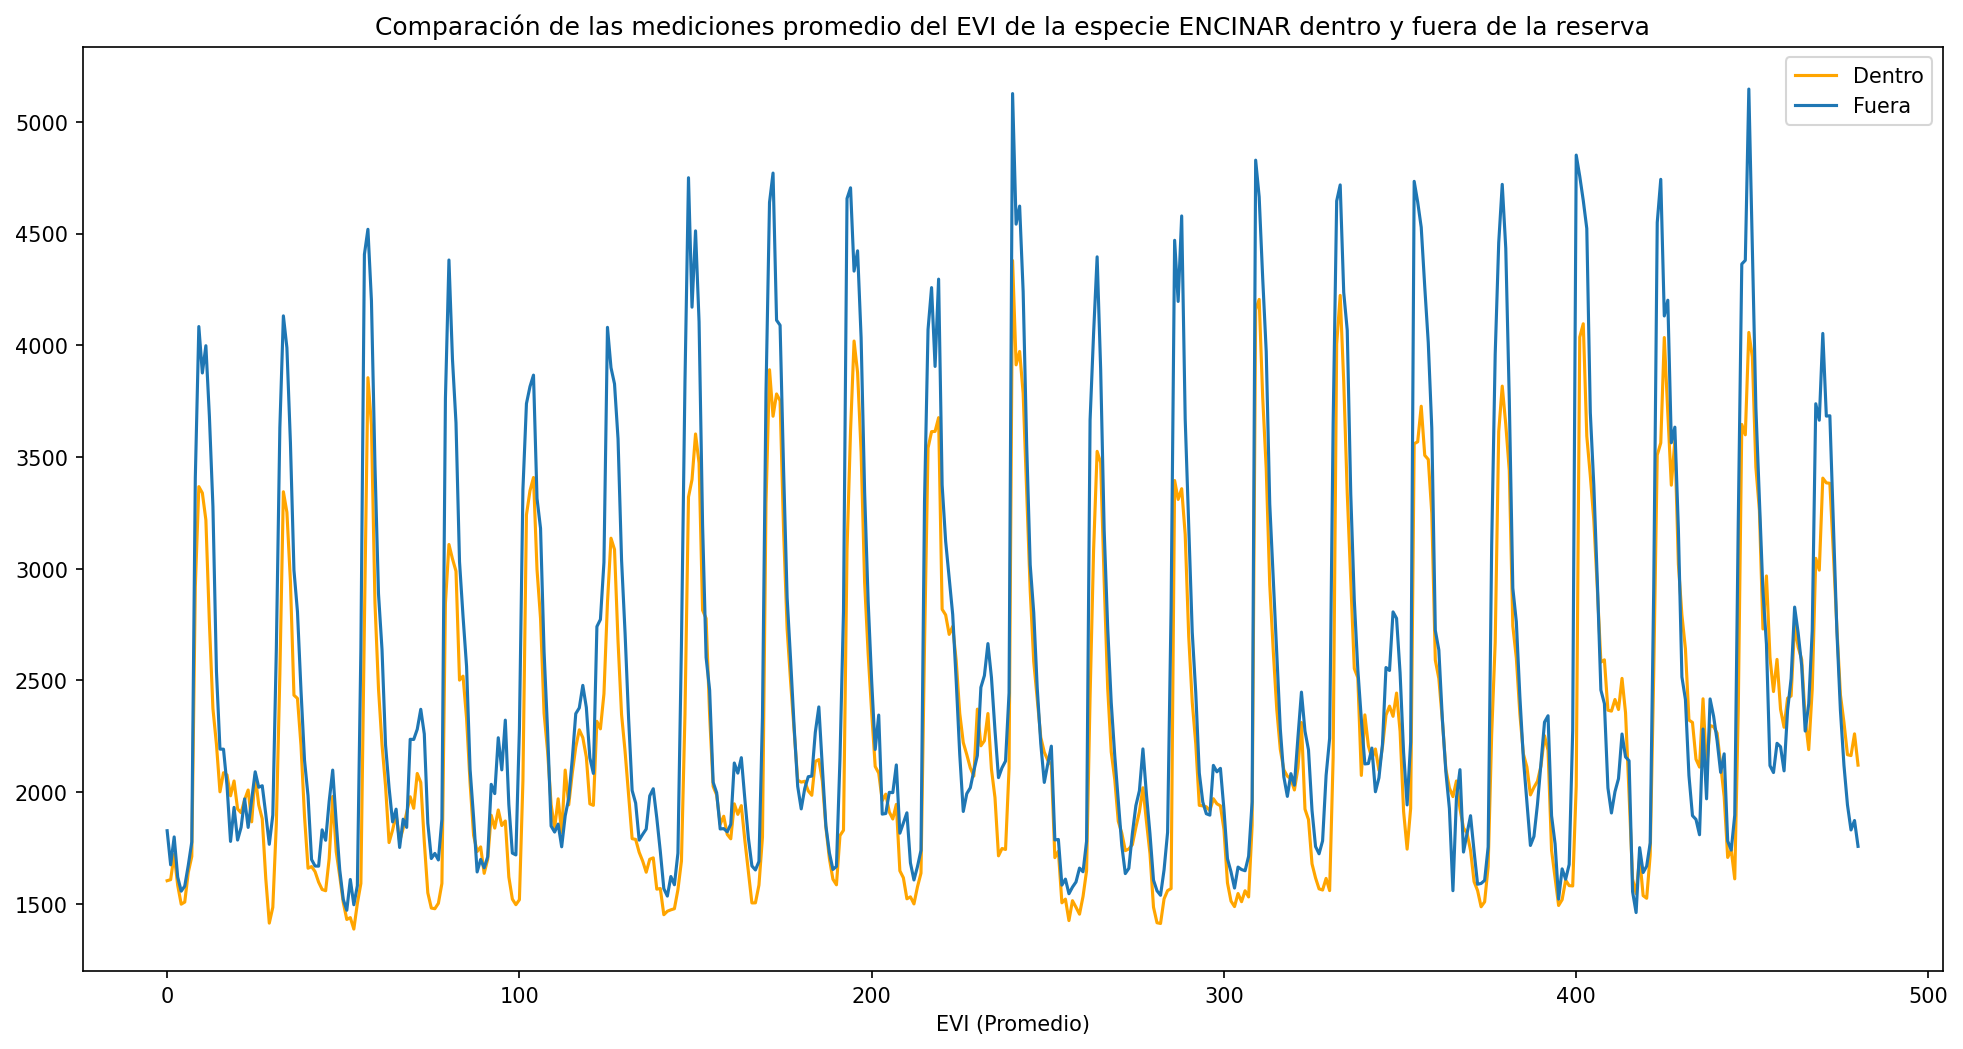

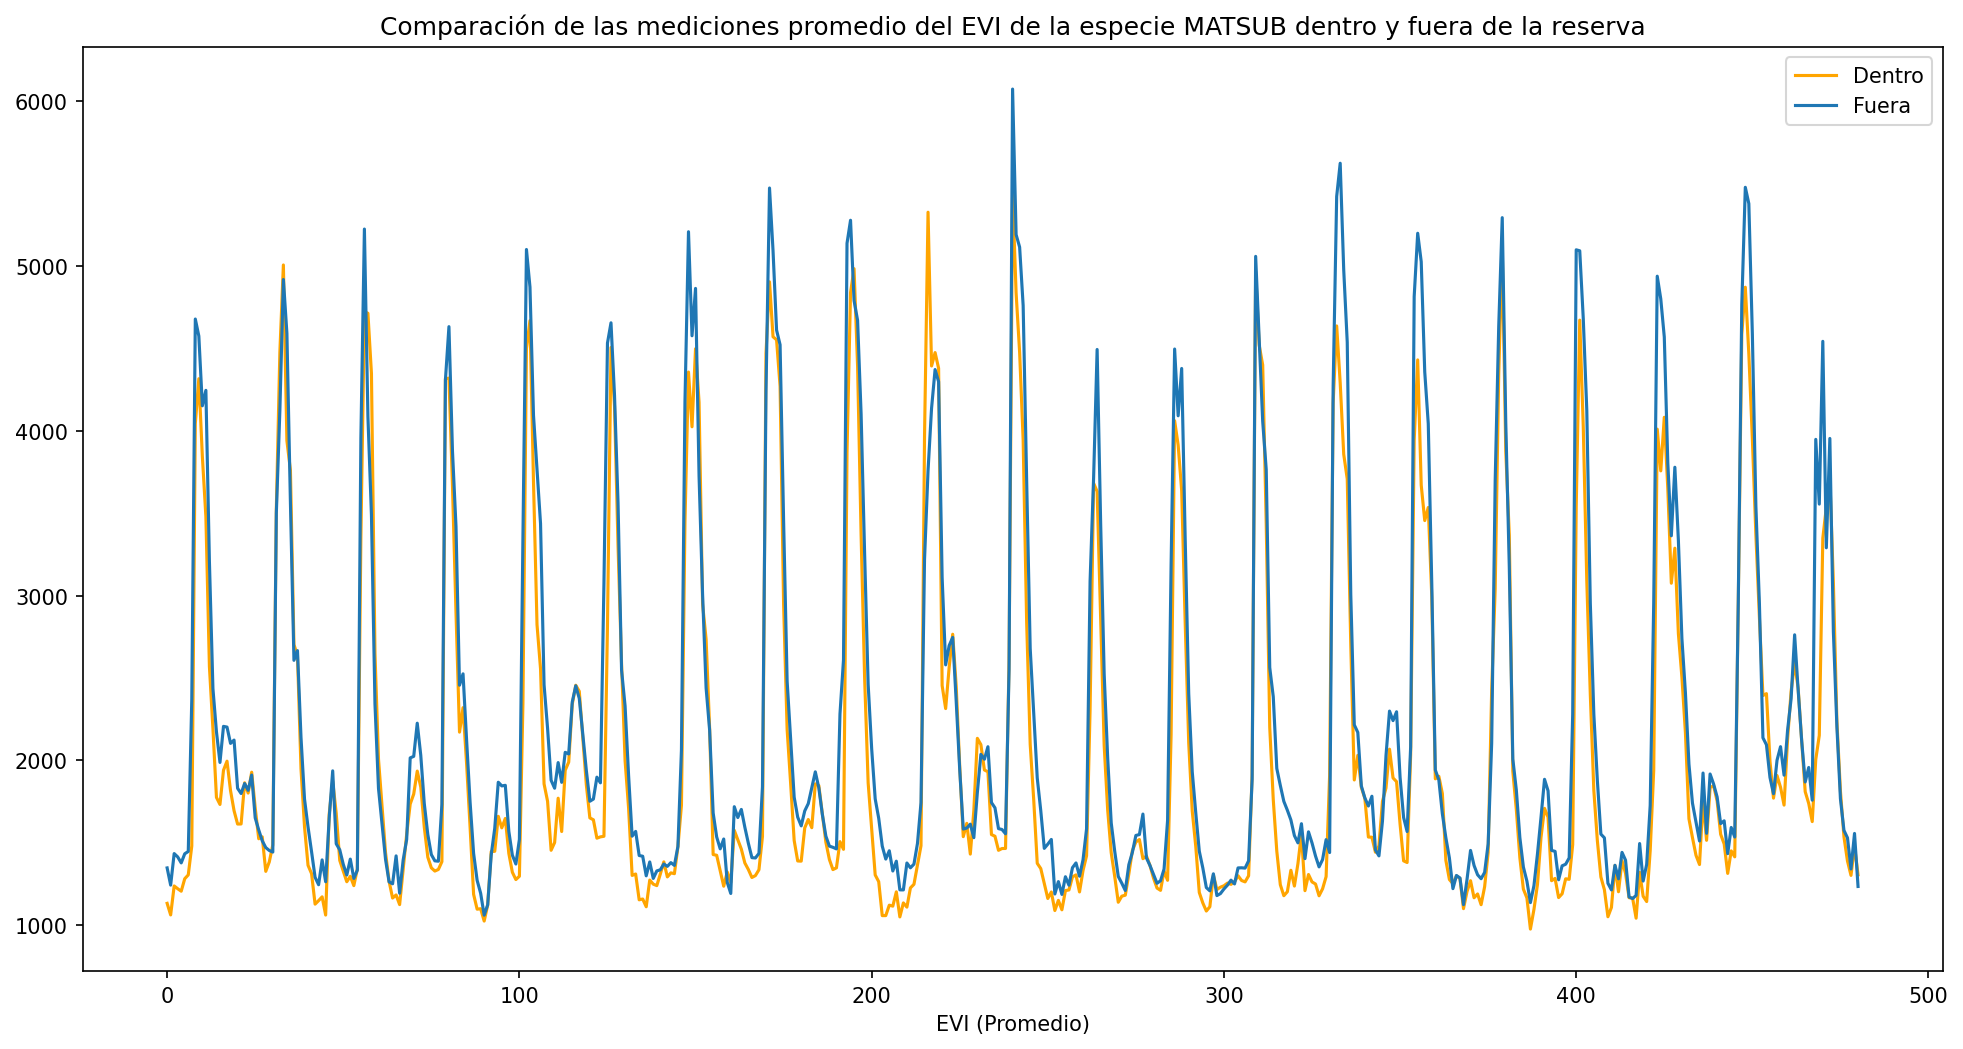

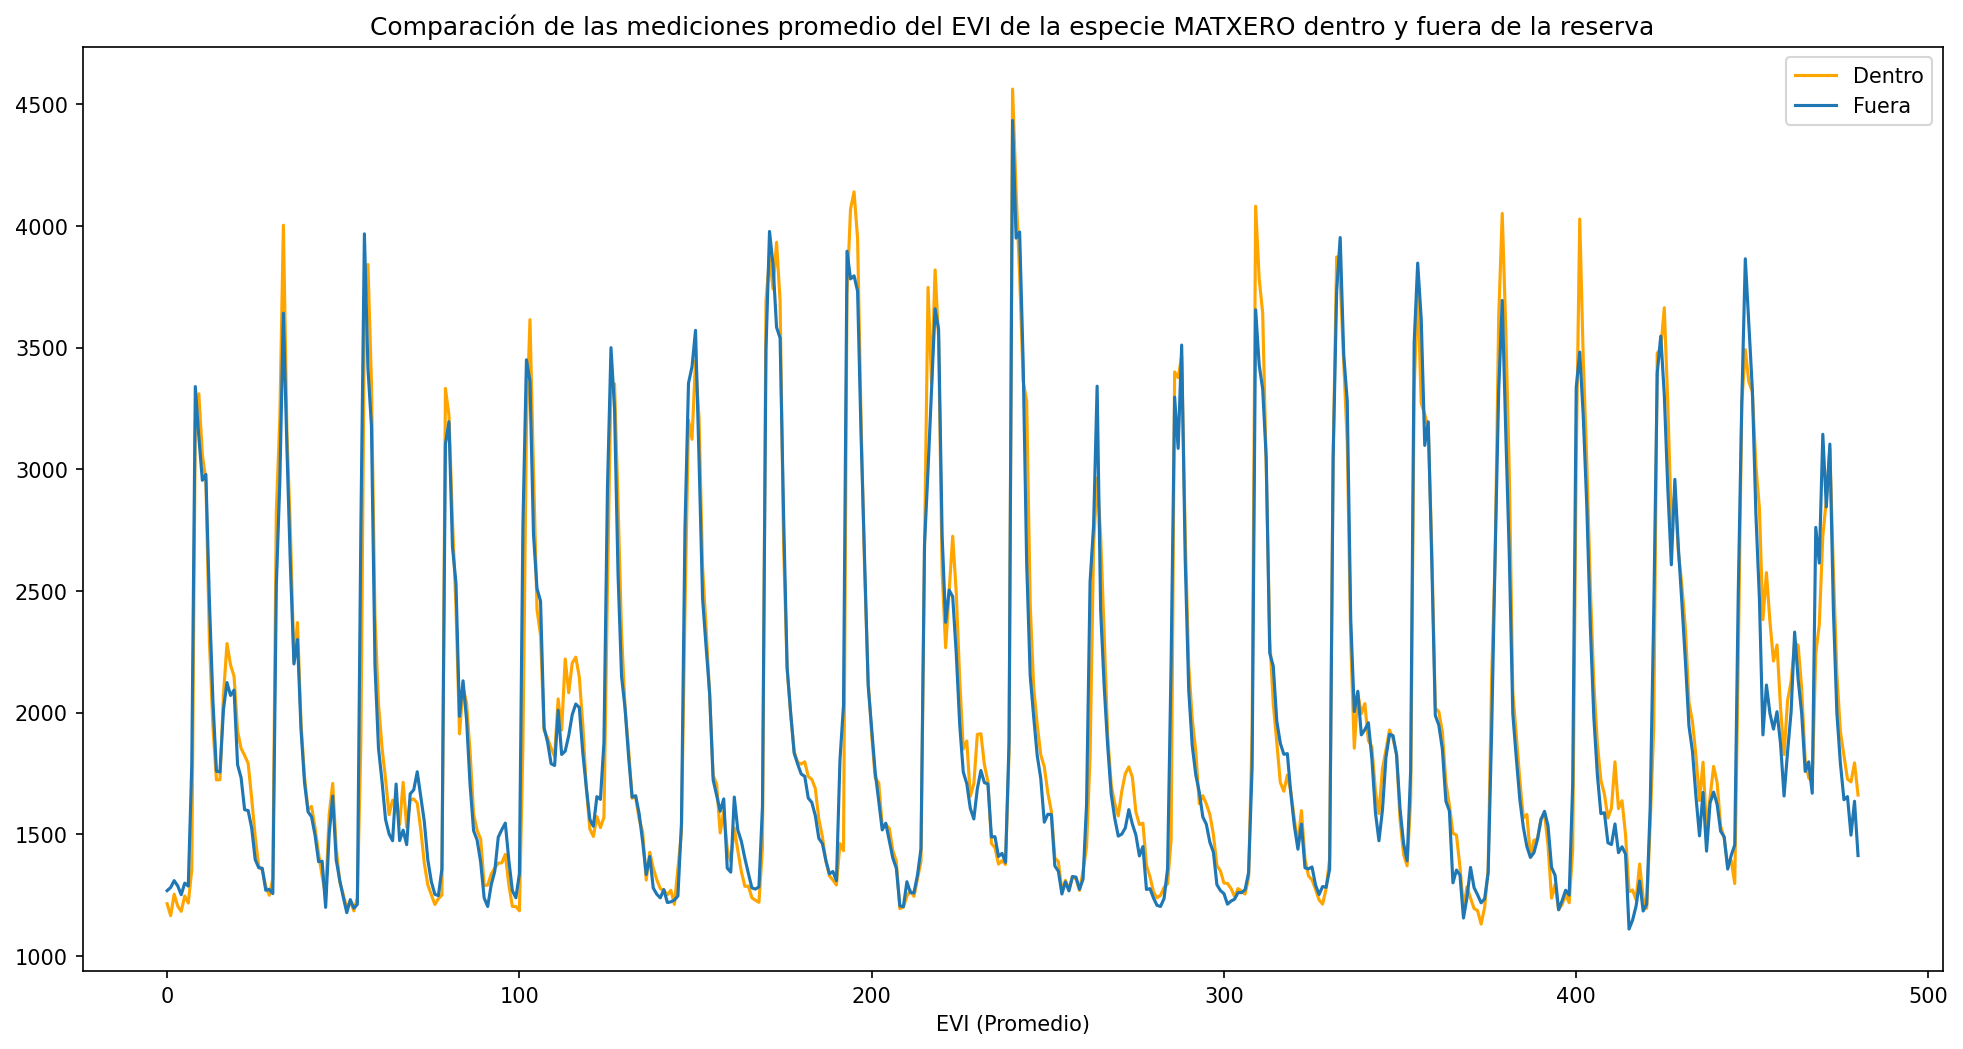

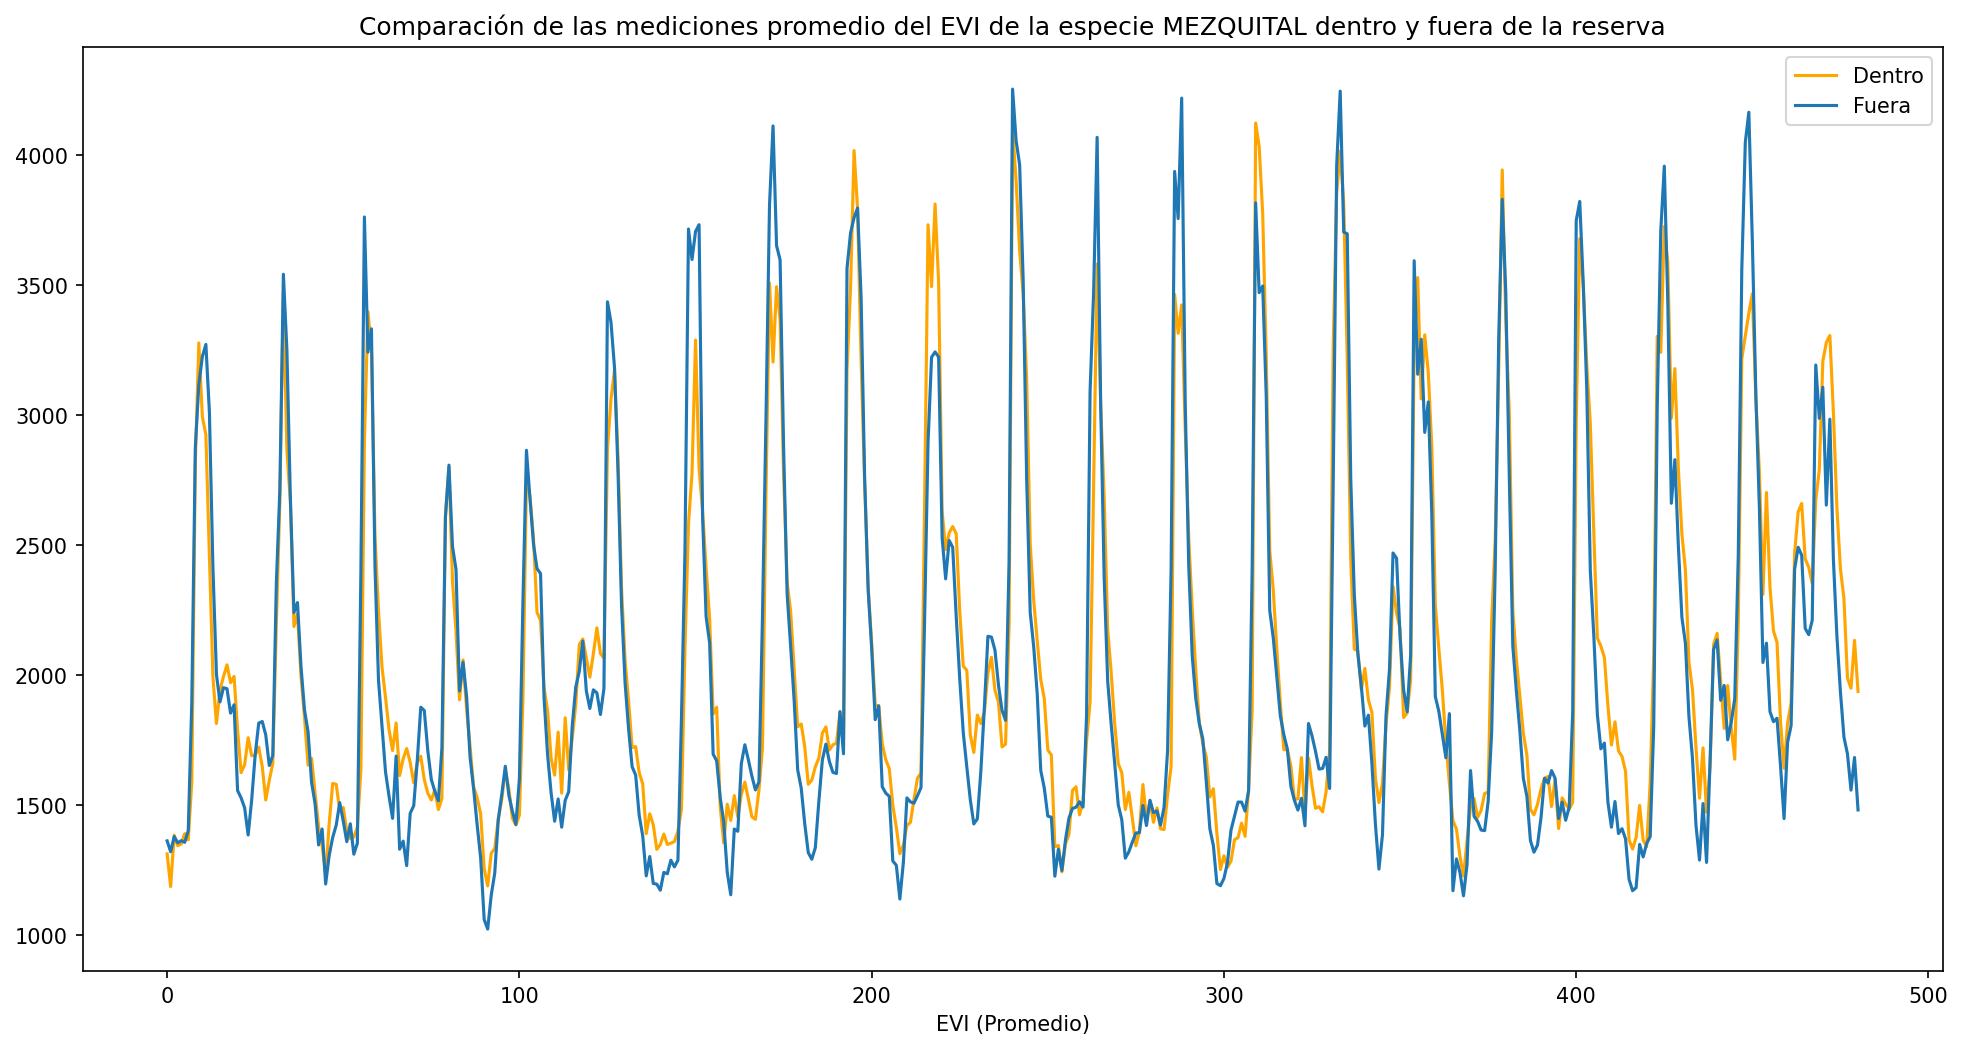

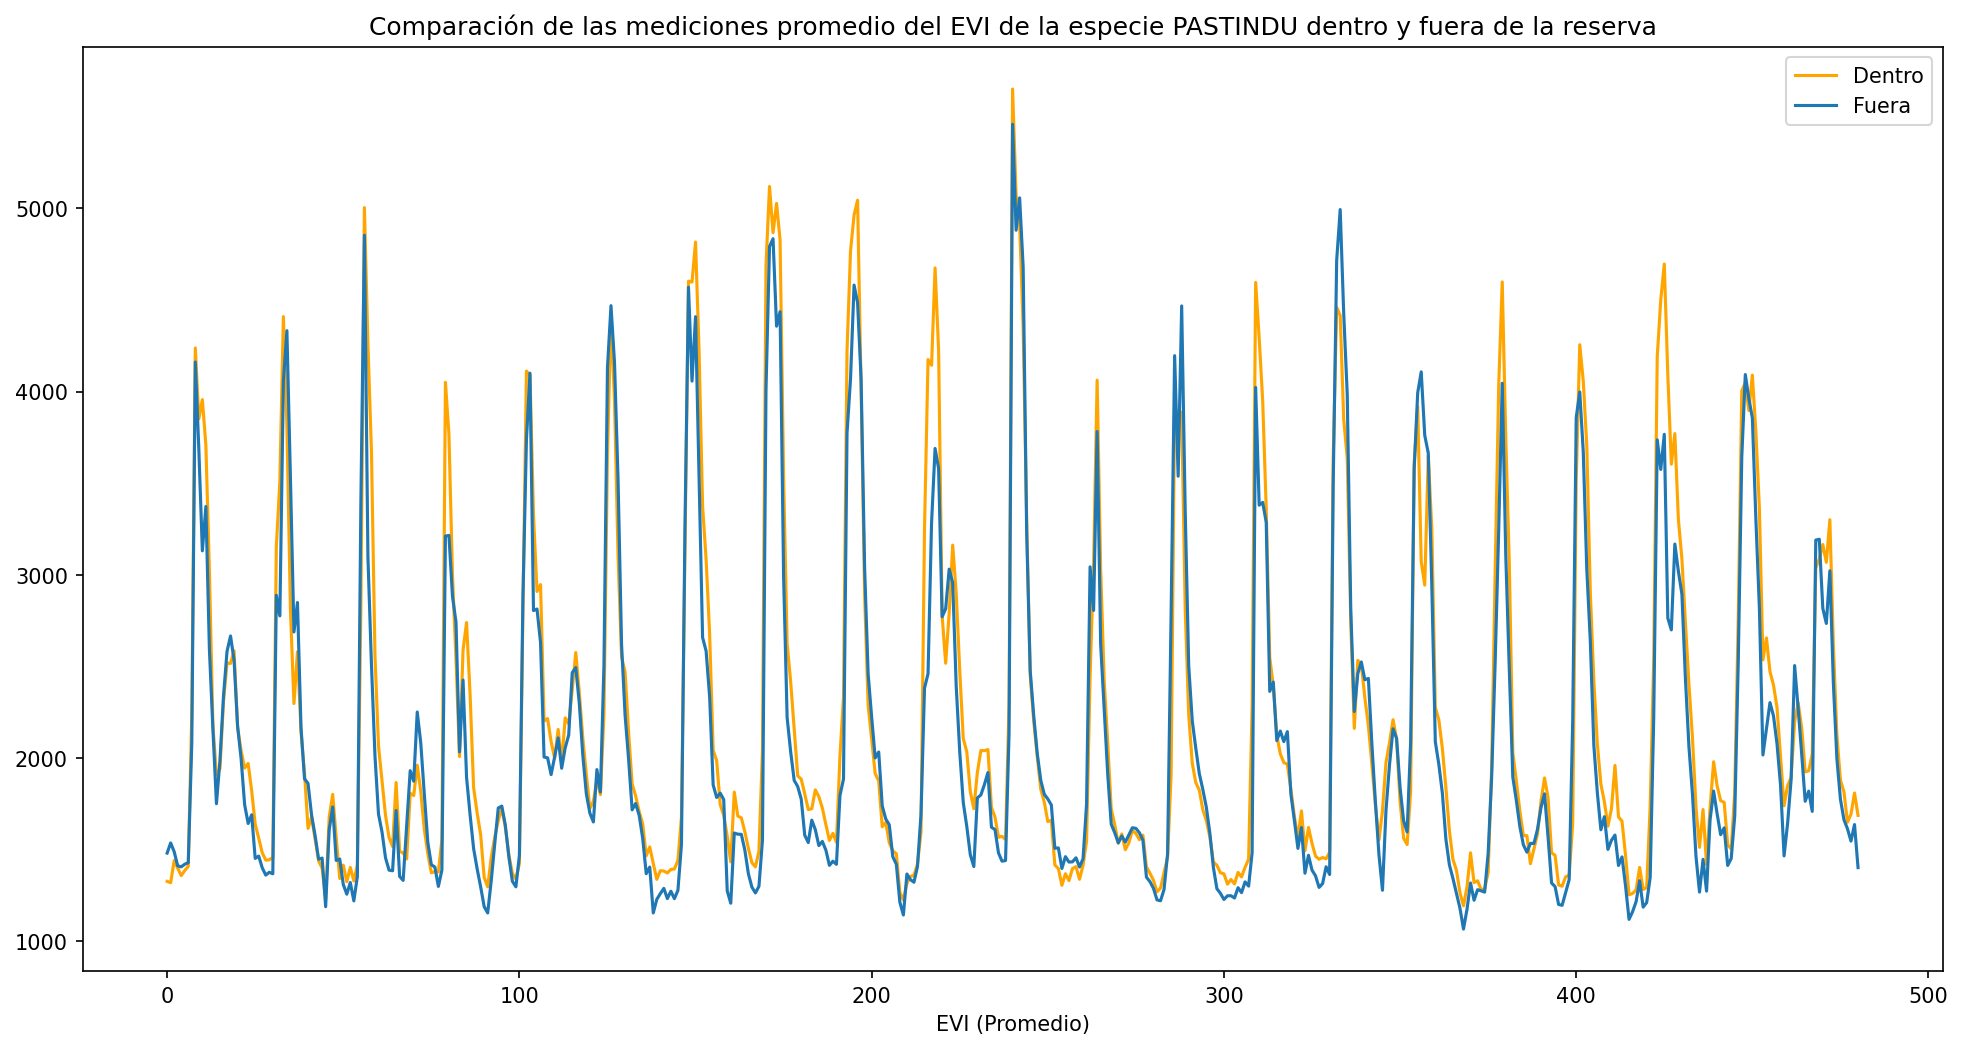

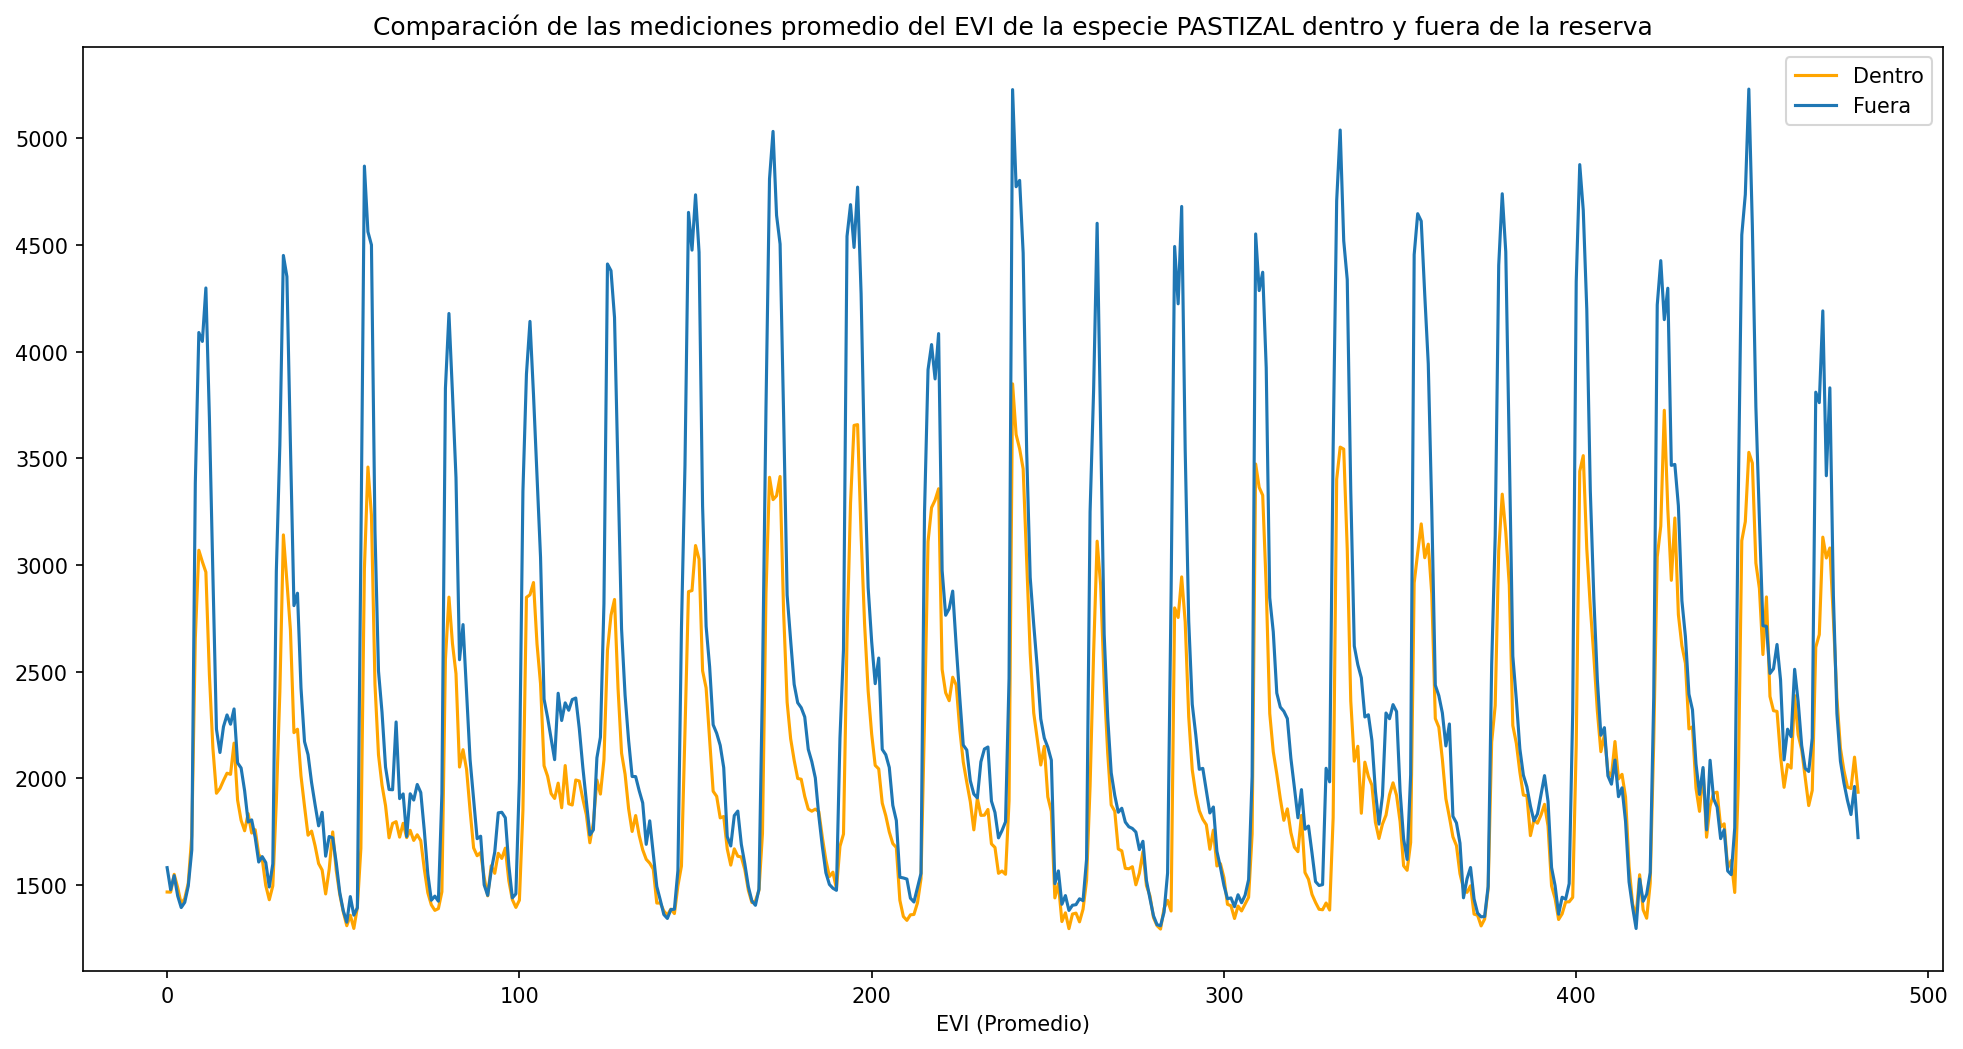

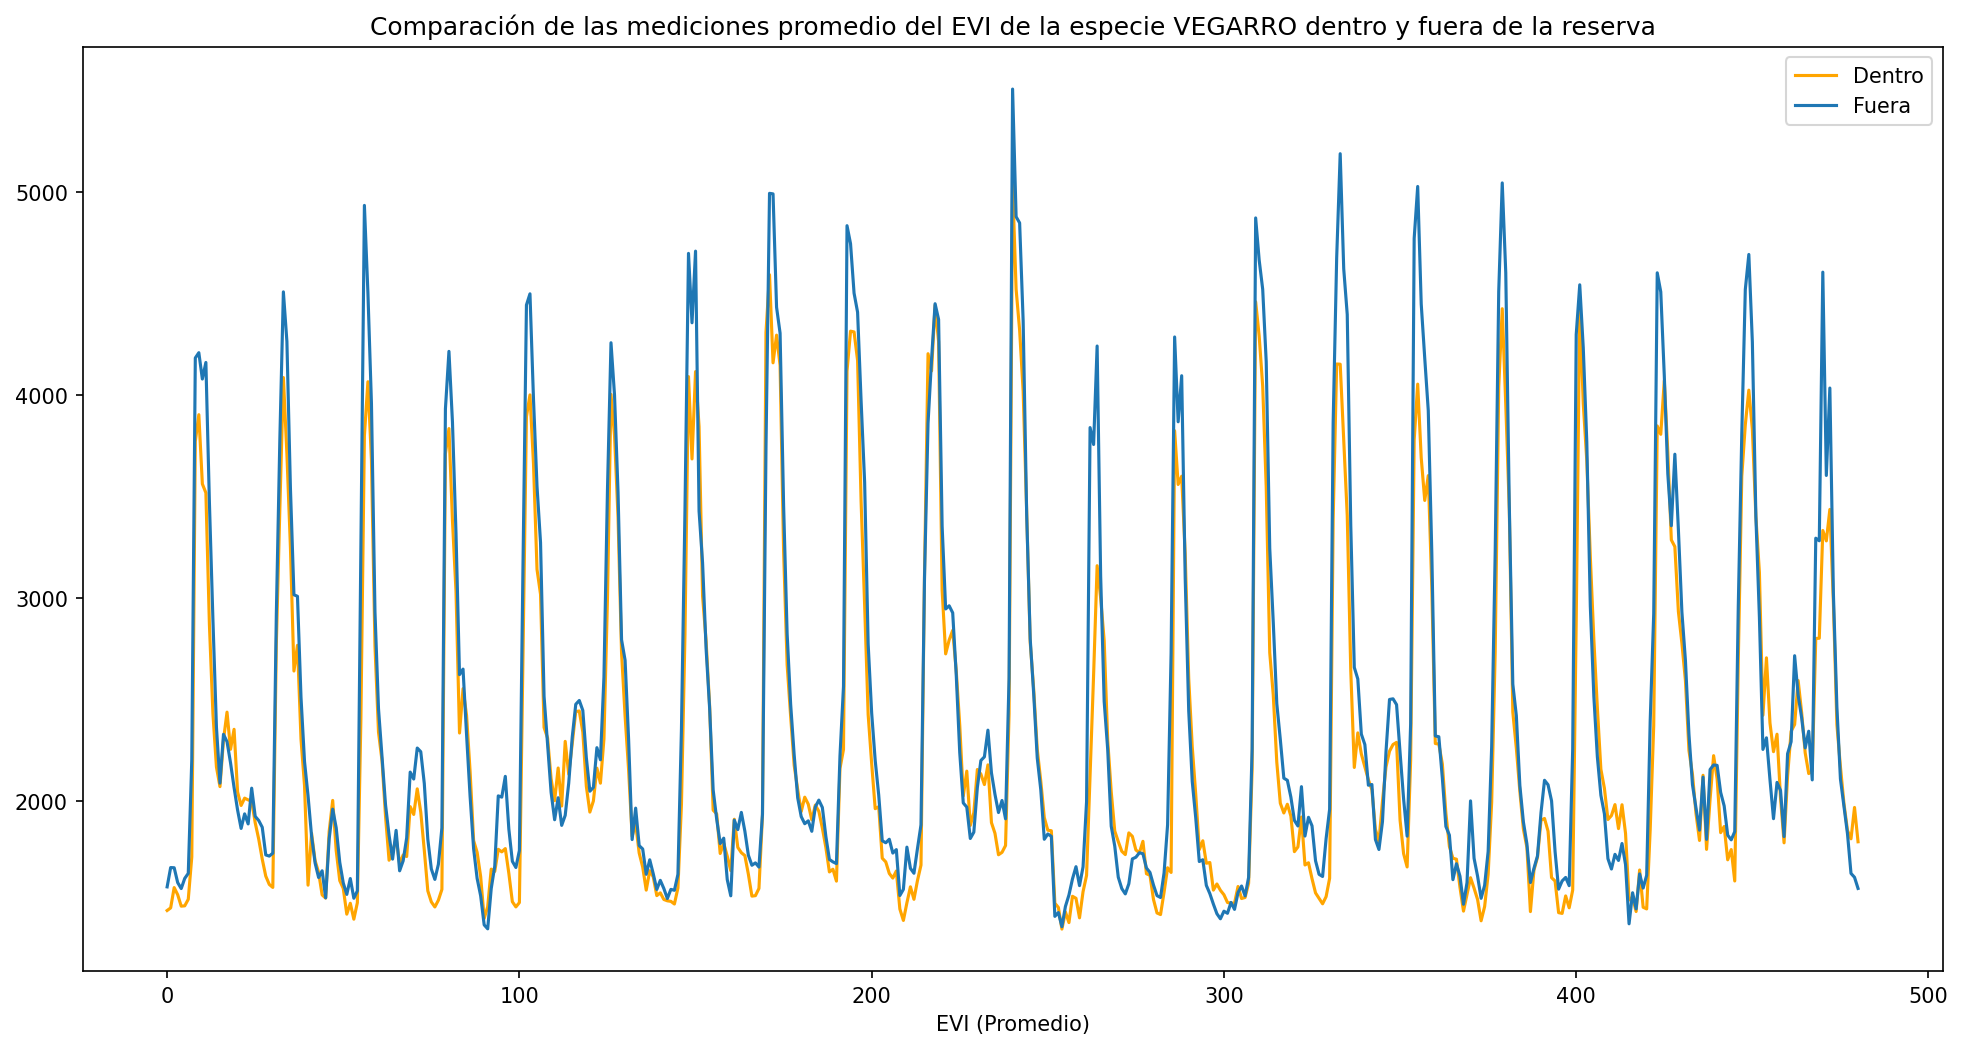

In [5]:
metrica = 'EVI'
for especie in especies:
    comparacionMetricas(ruta, metrica, especie)

## Comparación del NDVI

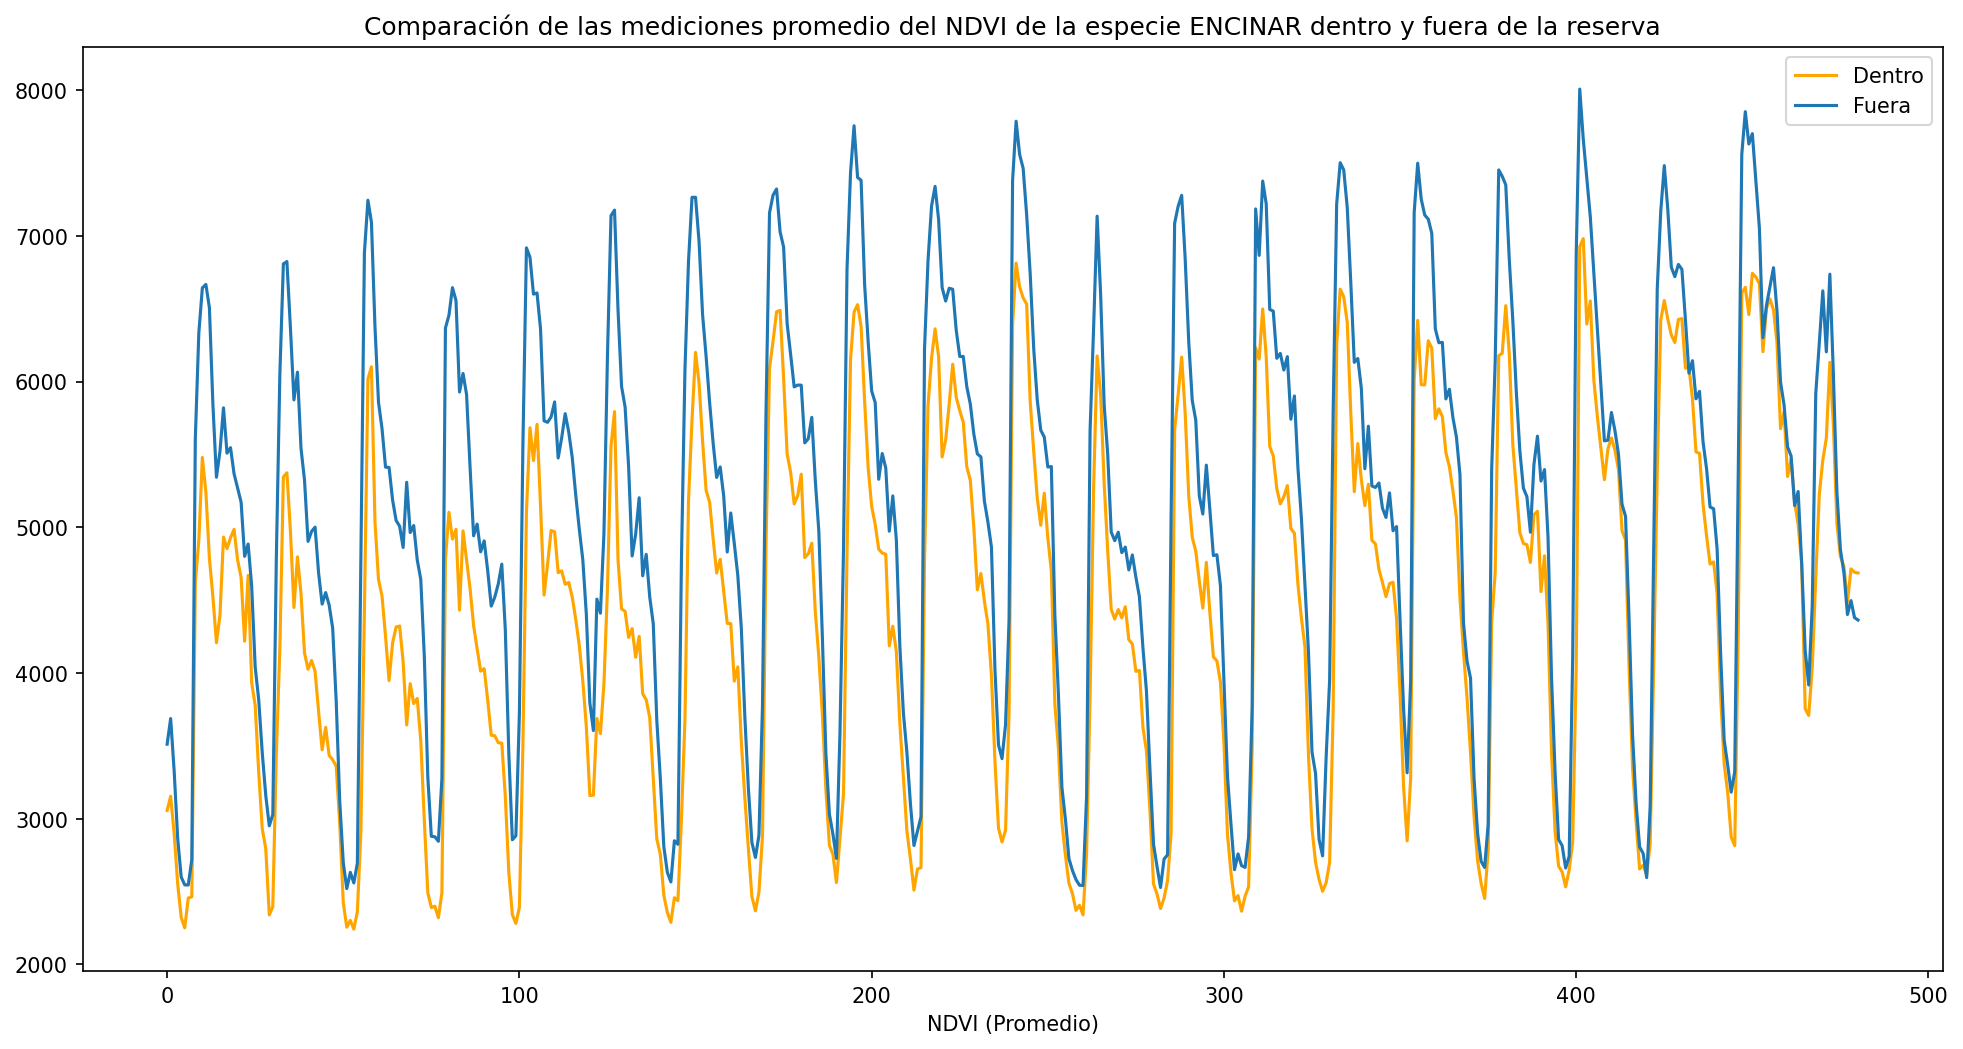

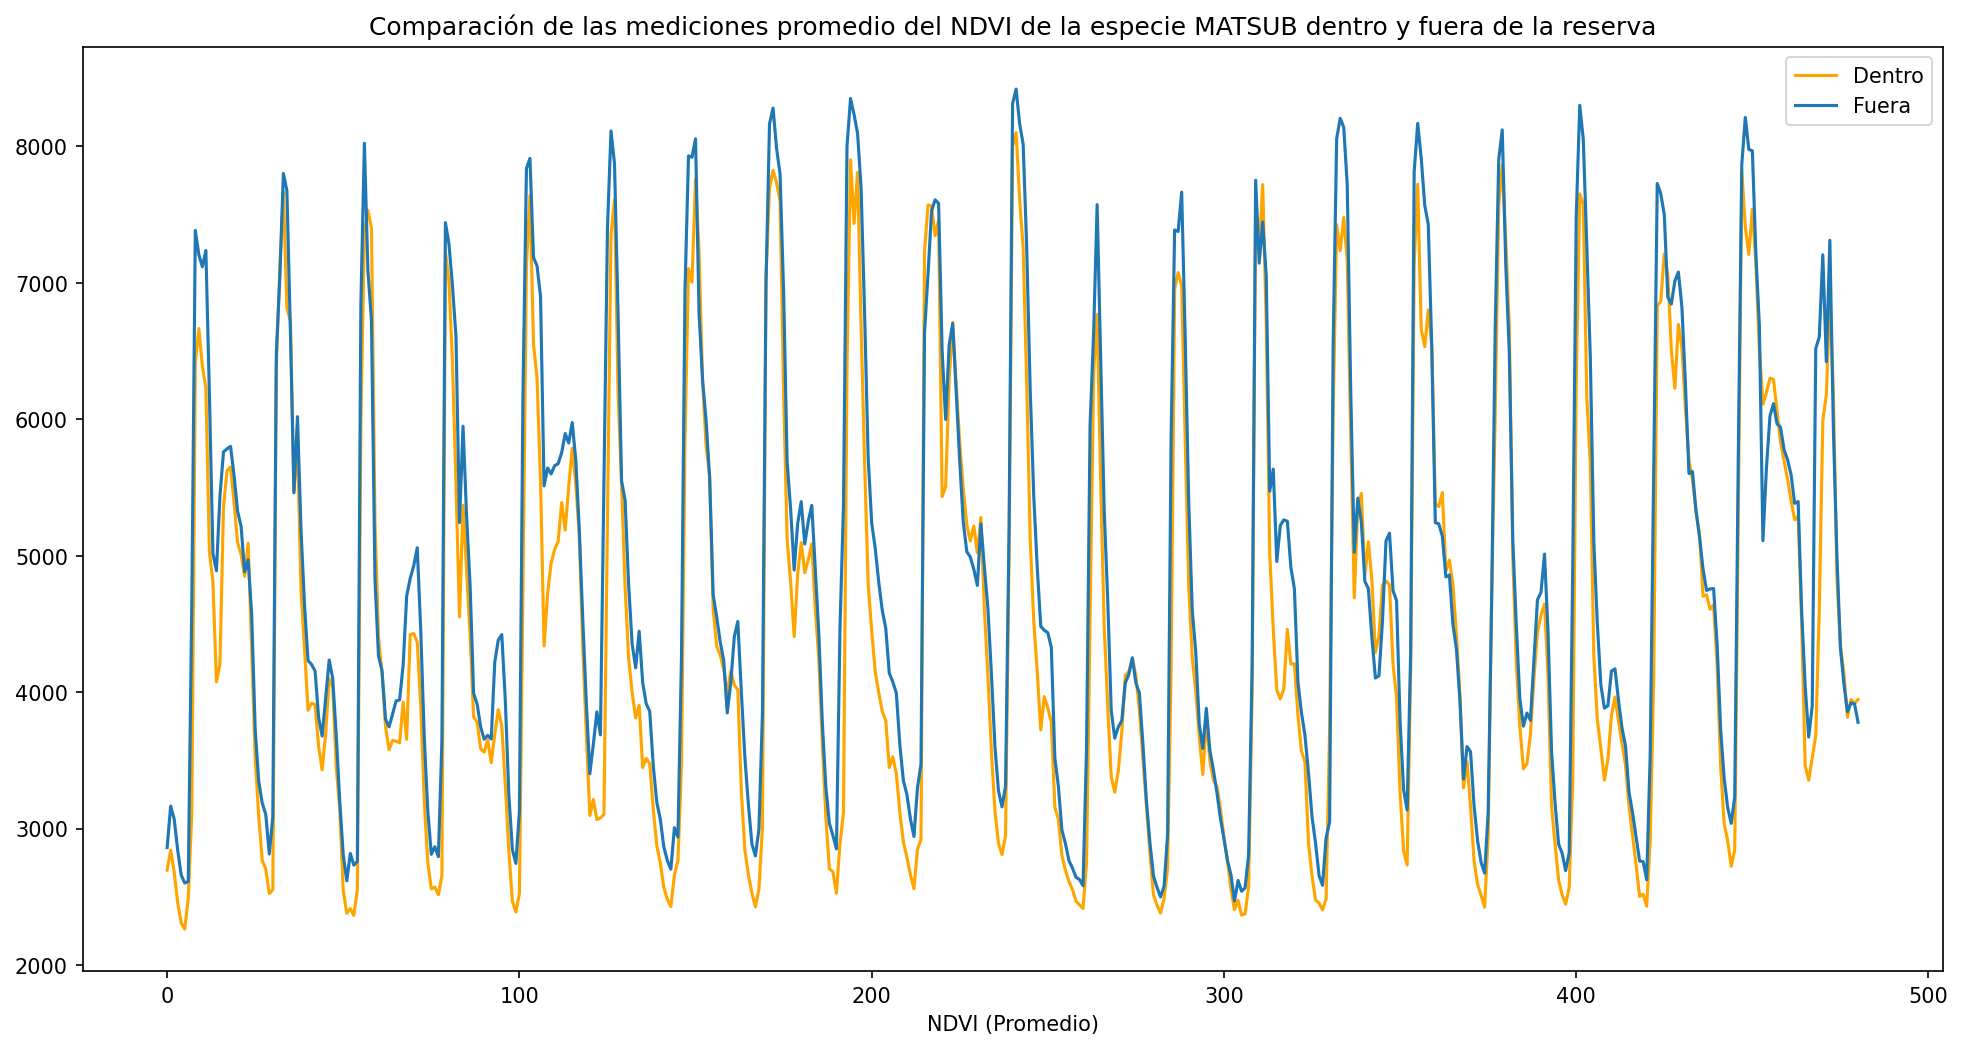

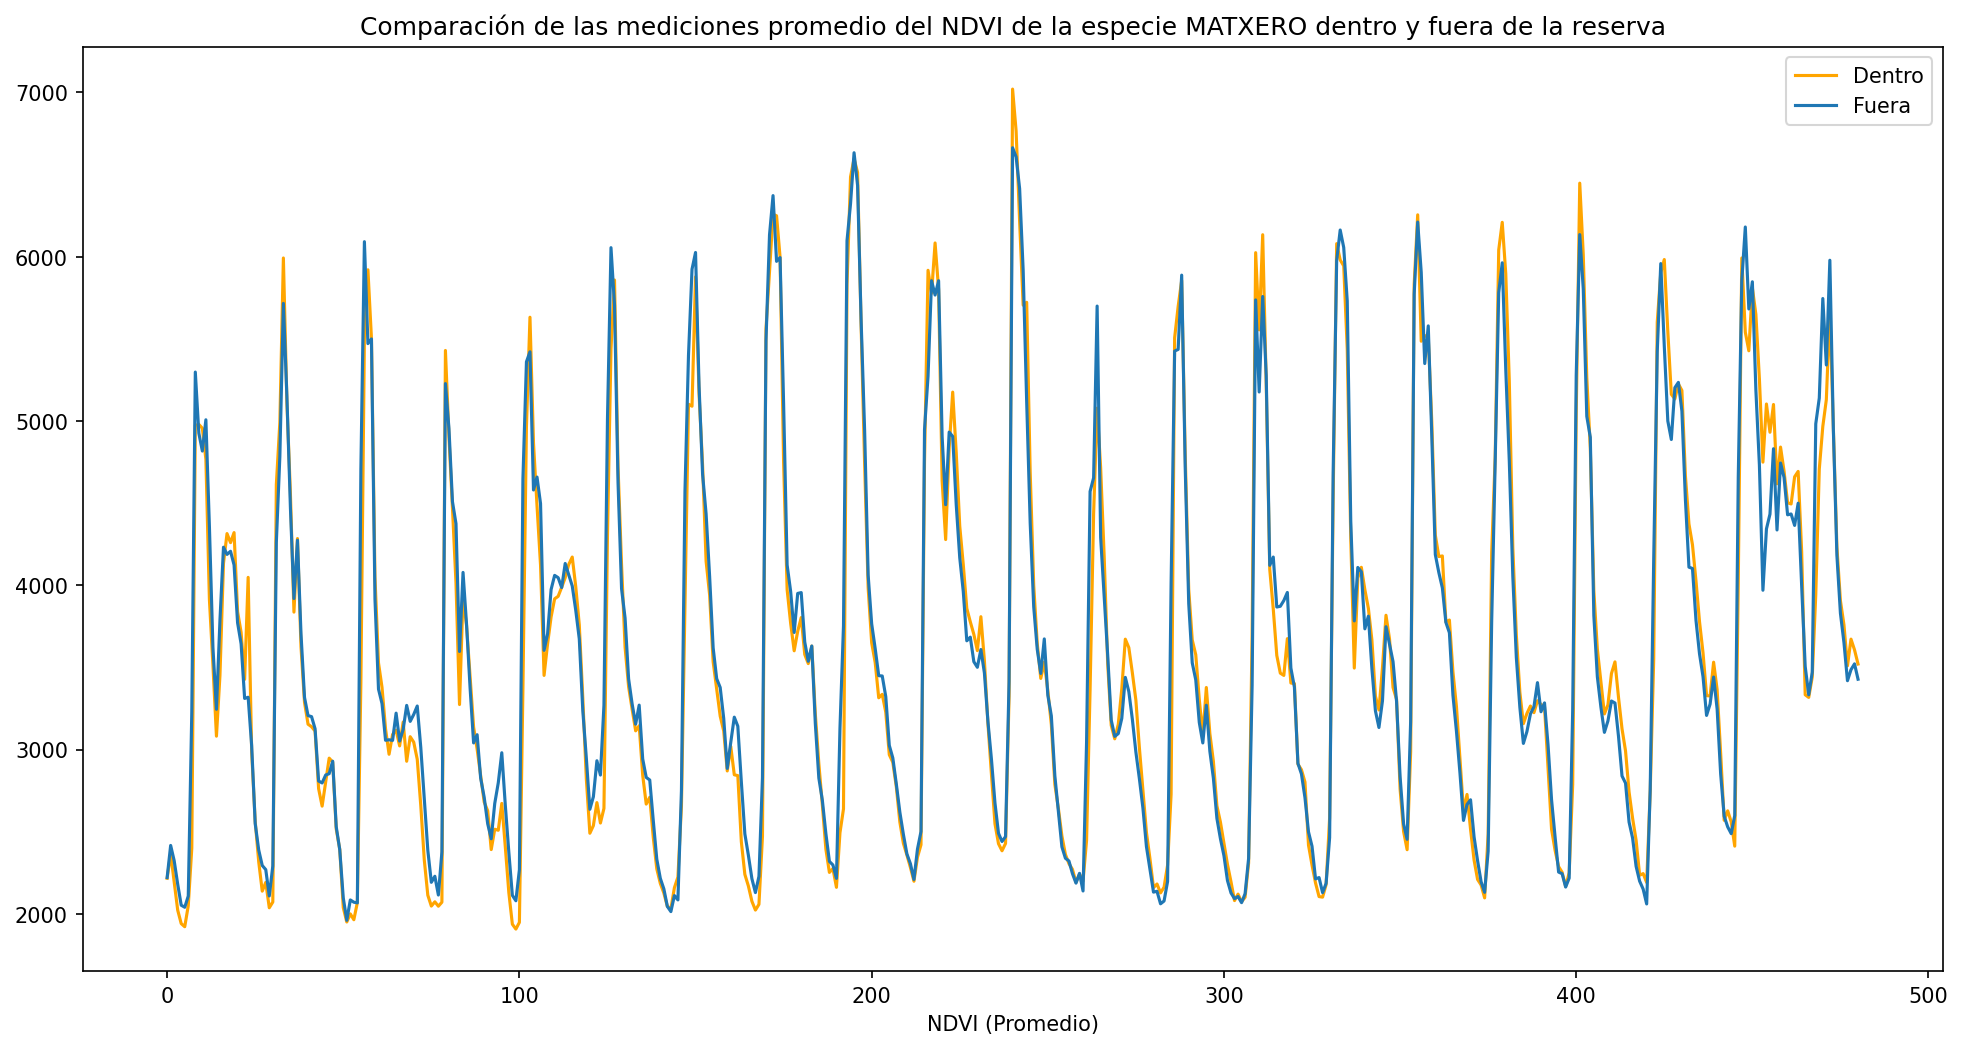

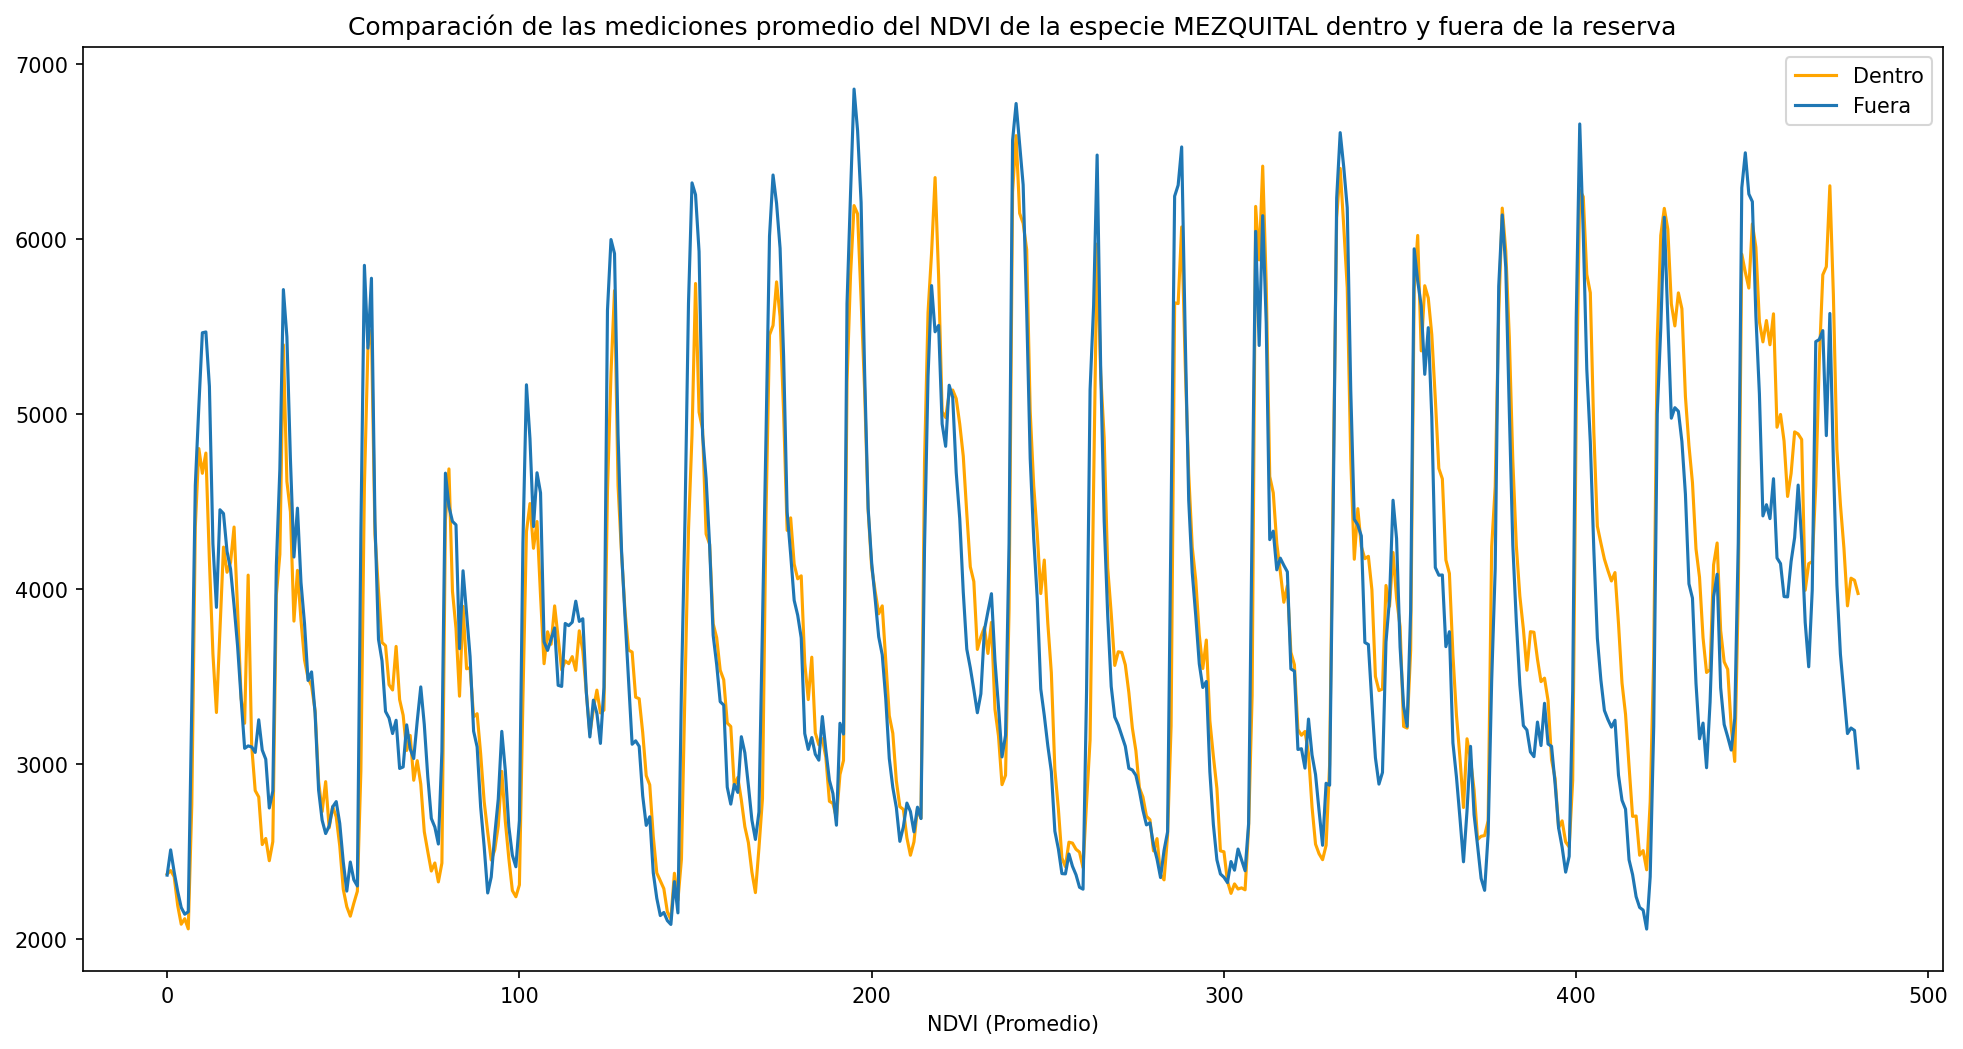

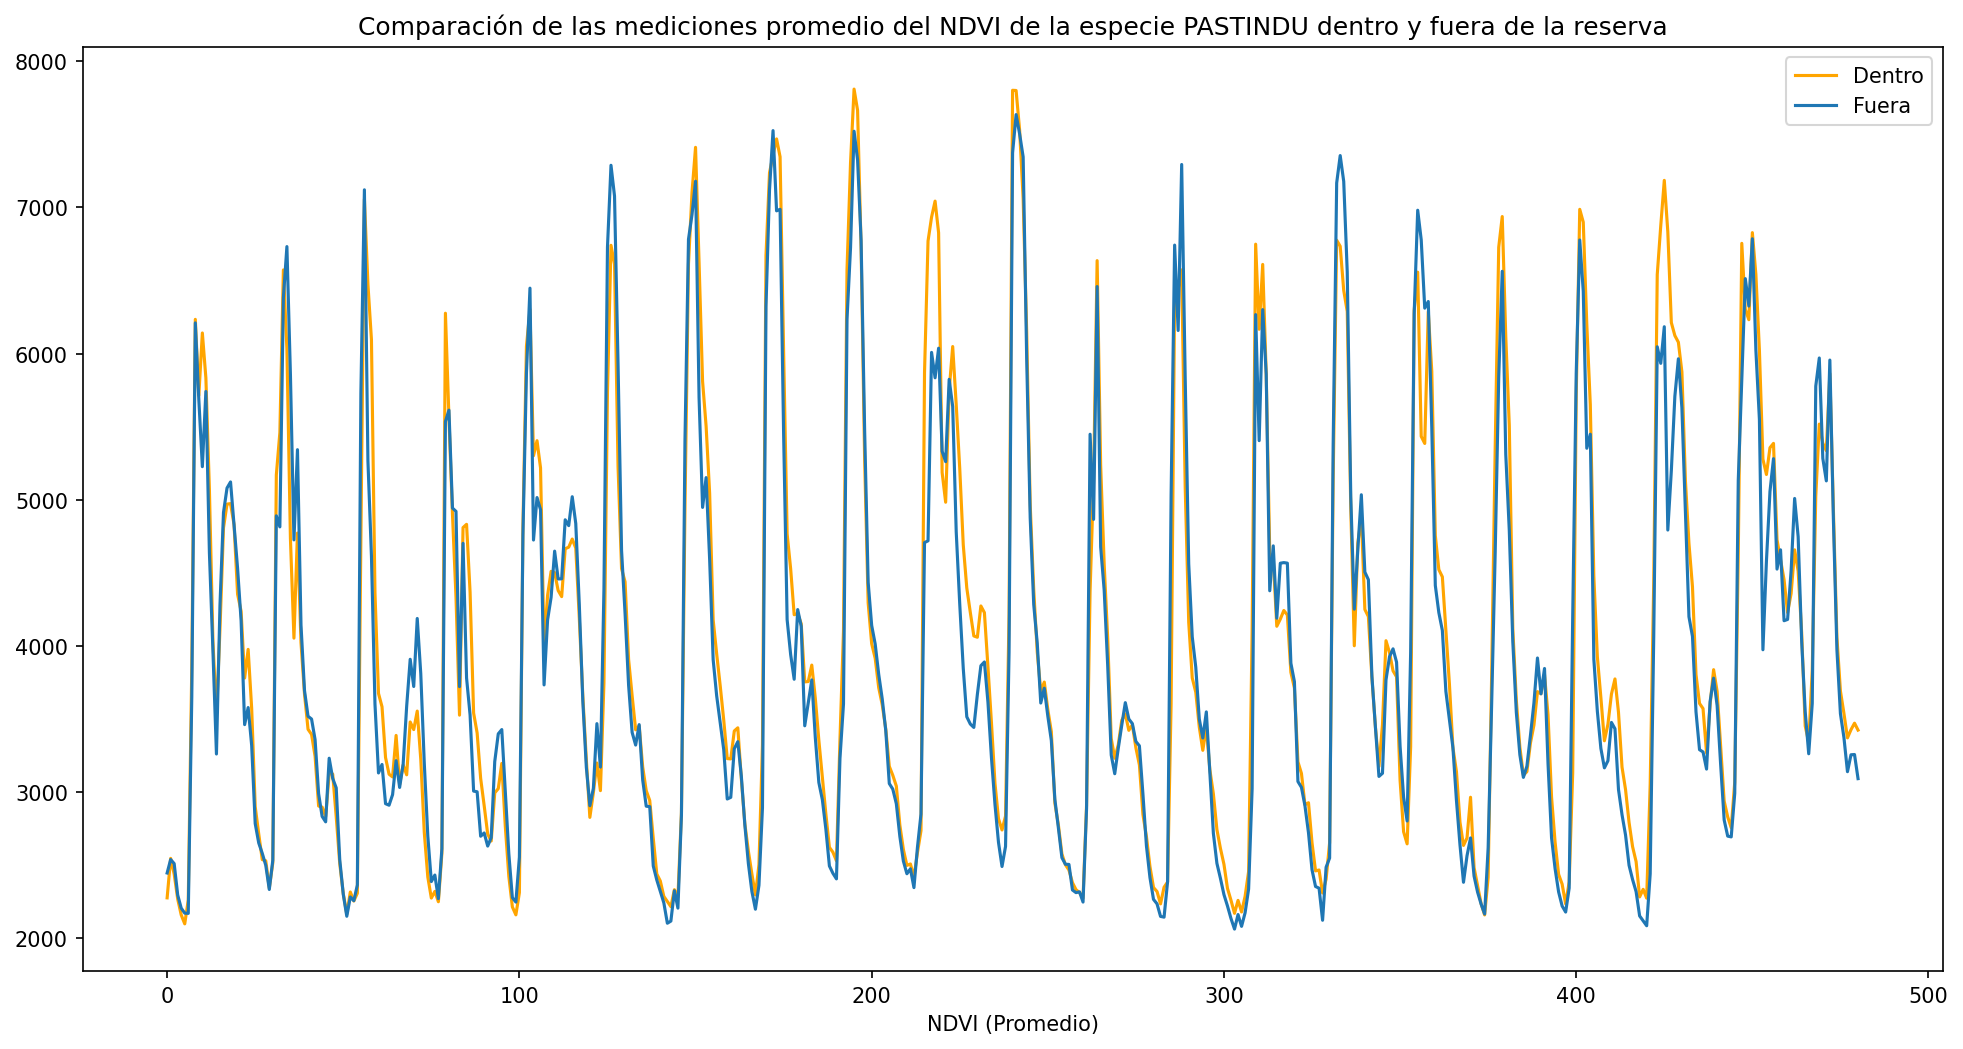

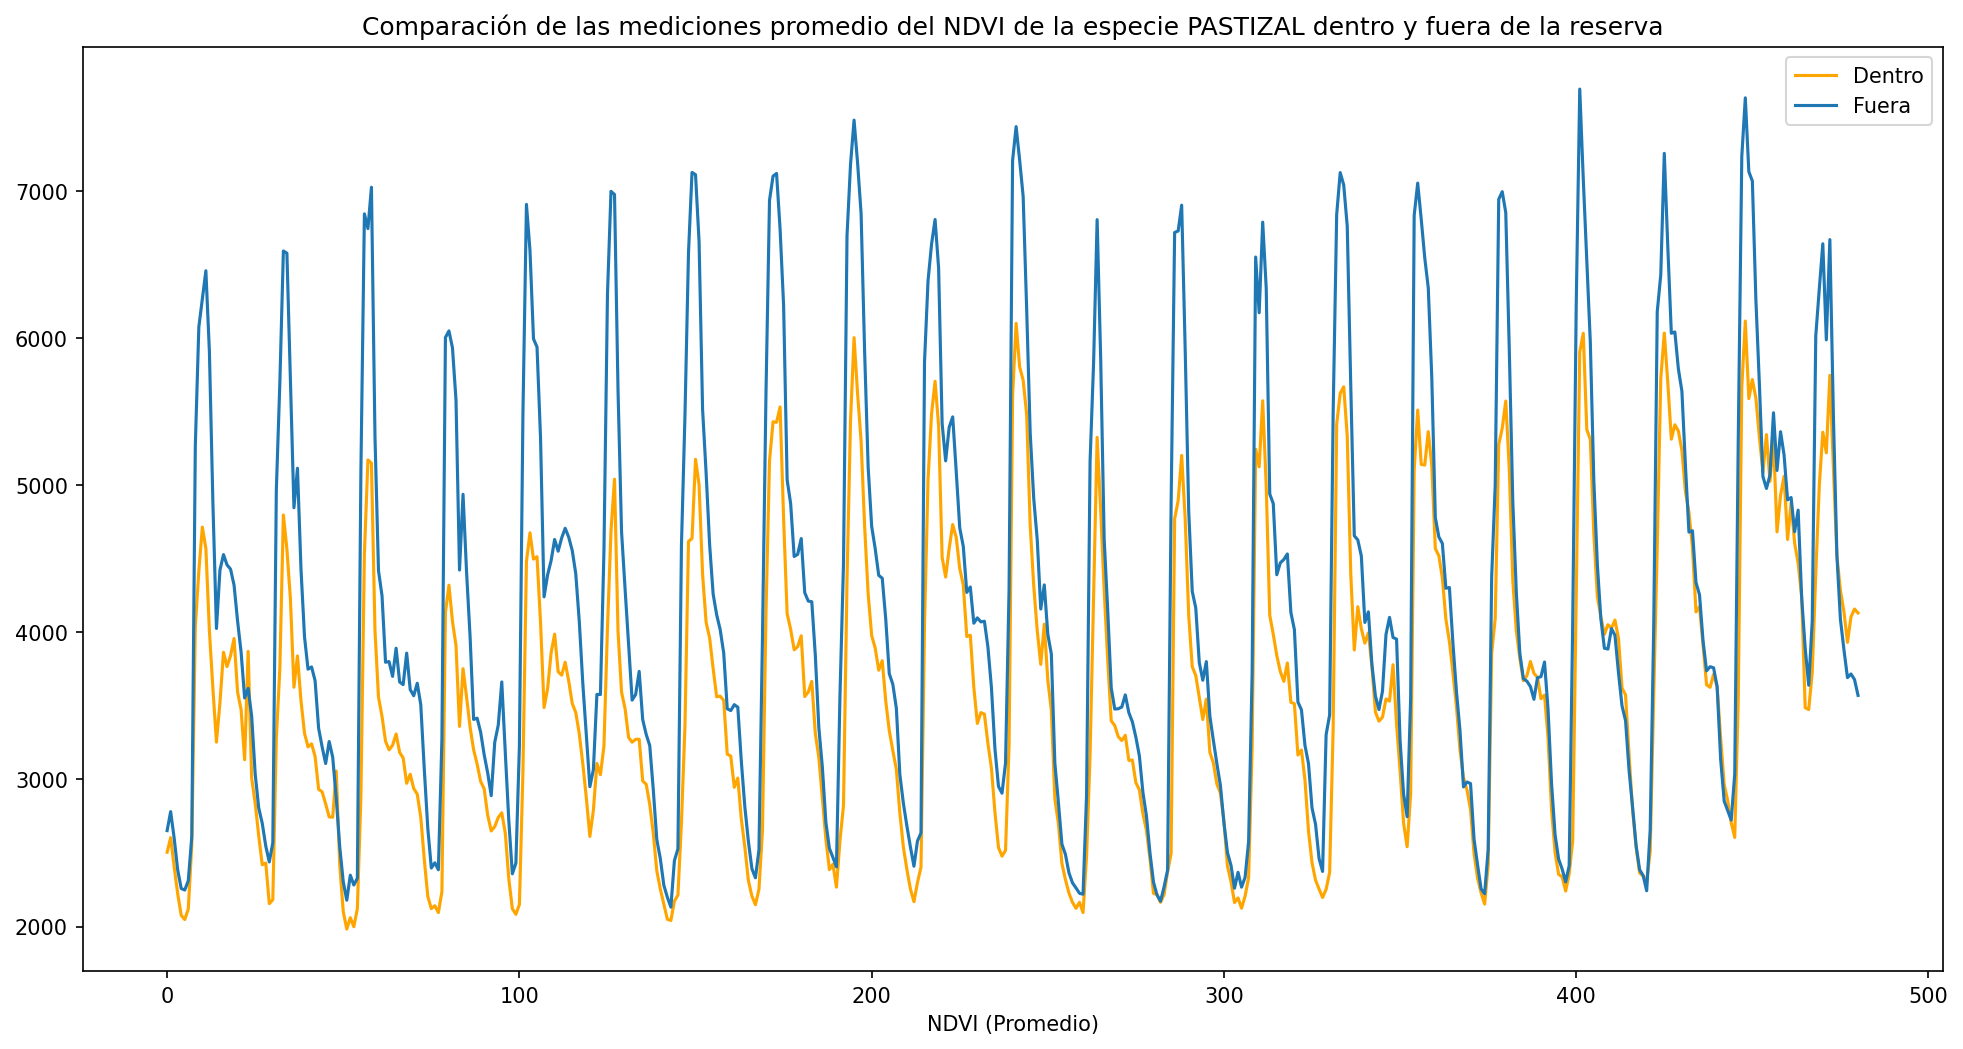

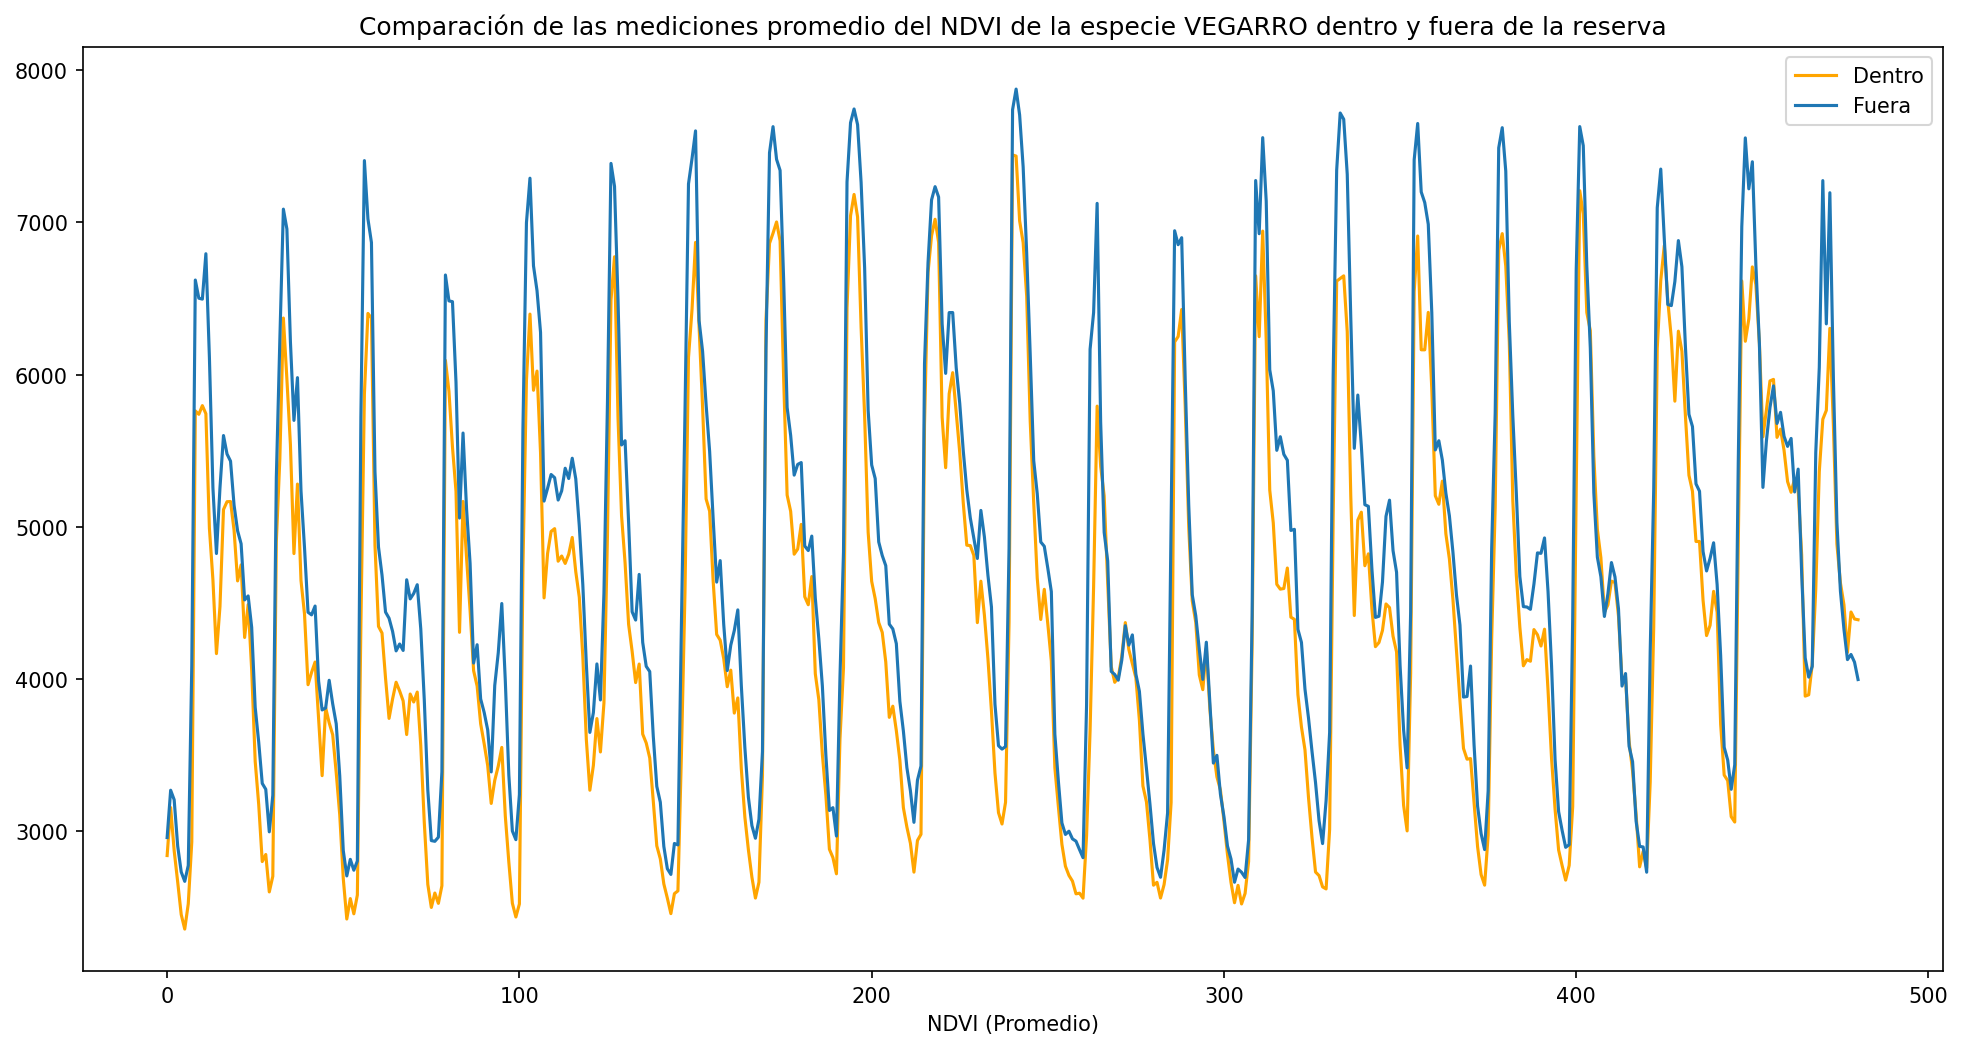

In [6]:
metrica = 'NDVI'
for especie in especies:
    comparacionMetricas(ruta, metrica, especie)